# Fraud Detection Exploration Notebook

### Import Analysis Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Configure Plotting Environment

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

### Load Transaction Dataset

In [3]:
# import os
# # Set the working directory to the project folder
# os.chdir(r'c:\Users\sande\OneDrive\Documents\project')

# Read the CSV file
df = pd.read_csv('AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Inspect Dataset Schema

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### List Available Columns

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Count Fraudulent Labels

In [6]:
df["isFraud"].value_counts() 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

### Count Flagged Frauds

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### Check Missing Values

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Review Dataset Size

In [9]:
df.shape

(6362620, 11)

### Calculate Fraud Rate

In [10]:
round(df["isFraud"].value_counts()[1] / df.shape[0]*100, 2)

np.float64(0.13)

### Plot Transaction Type Distribution

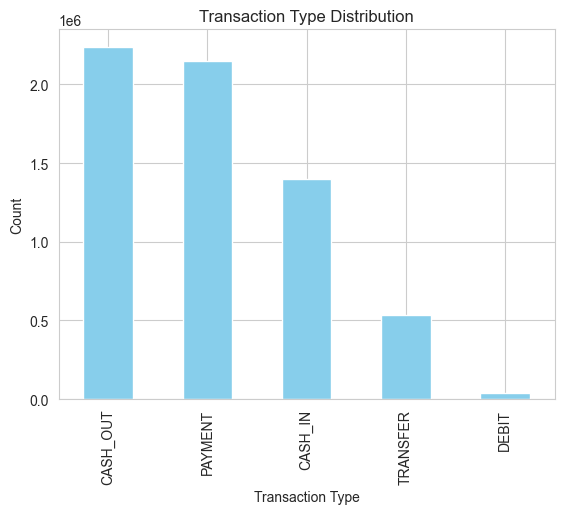

In [11]:
df["type"].value_counts().plot(kind="bar", title="Transaction Type Distribution", color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

### Preview Fraud Rate Series

In [12]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

### Plot Fraud Share By Type

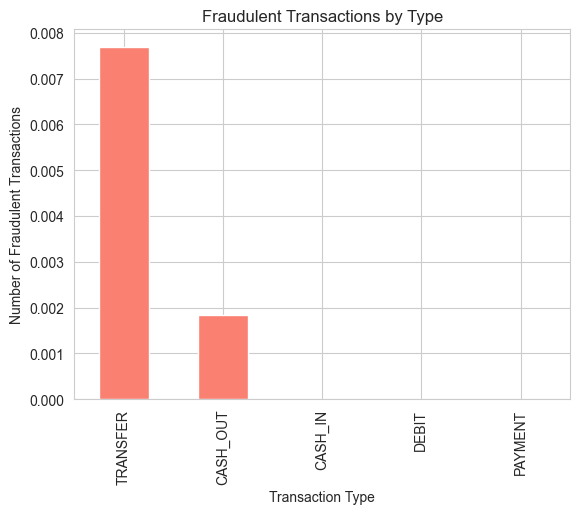

In [13]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraudulent Transactions by Type", color='salmon')
plt.xlabel("Transaction Type") 
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

### Summarize Transaction Amounts

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

### Visualize Log Amount Distribution

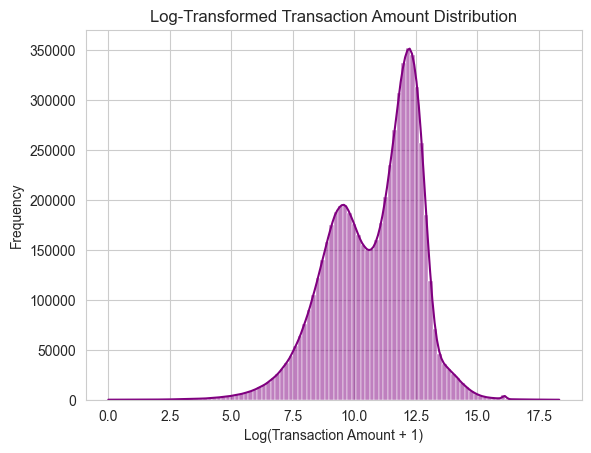

In [15]:
sns.histplot(np.log1p(df["amount"]), bins=100, color='purple', kde=True)
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log(Transaction Amount + 1)")
plt.ylabel("Frequency")
plt.show()

### Compare Amounts By Fraud Status

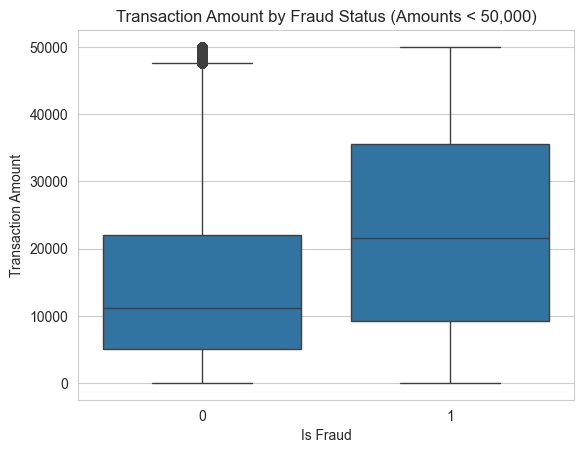

In [16]:

sns.boxplot(data=df[df["amount"] < 50000], x='isFraud', y='amount')
plt.title("Transaction Amount by Fraud Status (Amounts < 50,000)")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()


### Engineer Balance Difference Features

In [17]:
# correct column names and create balance difference columns
df["balanceDiffOrg"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

# quick check
df[["balanceDiffOrg", "balanceDiffDest"]].head()

,balanceDiffOrg,balanceDiffDest
0,9839.64,0.0
1,1864.28,0.0
2,181.00,0.0
3,181.00,21182.0
4,11668.14,0.0


### Count Negative Origin Balance Diffs

In [18]:
(df["balanceDiffOrg"]<0).sum()

np.int64(1399253)

### Count Negative Destination Balance Diffs

In [19]:
(df["balanceDiffDest"] < 0).sum()

np.int64(2806464)

### Preview Dataset Snapshot

In [20]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


### Track Fraud Counts Over Time

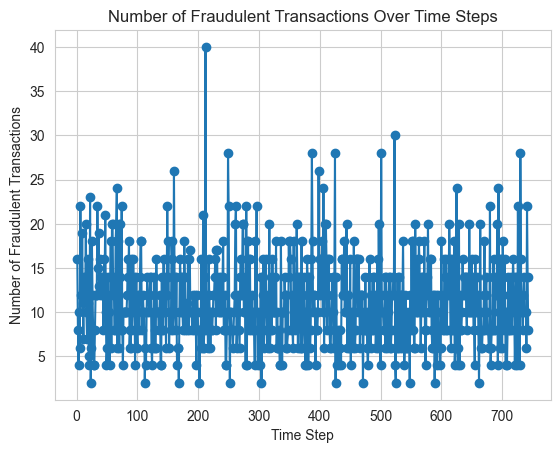

In [21]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, marker='o')
plt.title("Number of Fraudulent Transactions Over Time Steps")
plt.xlabel("Time Step") 
plt.ylabel("Number of Fraudulent Transactions")
plt.grid(True)
plt.show()
df.drop(columns="step", inplace=True)

### Inspect Dataset After Dropping Step Feature

In [22]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### Identify Top Senders

In [23]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

### Identify Top Receivers

In [24]:
top_recievers = df['nameDest'].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

### Highlight Fraudulent Senders

In [25]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users


nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

### Filter Fraud-Prone Transaction Types

In [26]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]

### Count Transactions Within Fraud-Prone Types

In [27]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

### Visualize Fraud Counts By Transaction Type

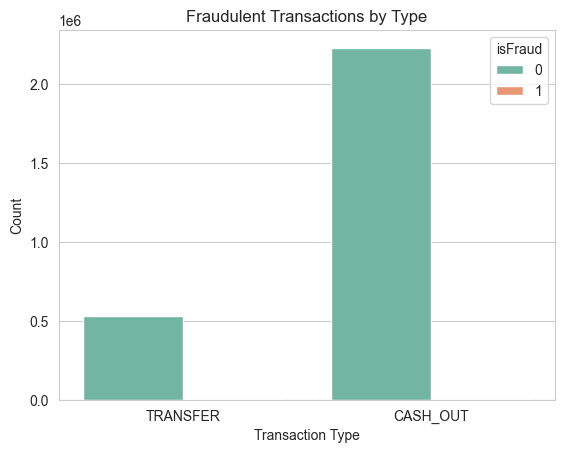

In [28]:
sns.countplot(data=fraud_types, x='type', hue='isFraud', palette='Set2')
plt.title("Fraudulent Transactions by Type") 
plt.xlabel("Transaction Type")
plt.ylabel("Count")

plt.show()



### Compute Feature Correlations

In [29]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "balanceDiffOrg", "balanceDiffDest", "isFraud"]].corr
corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrg,balanceDiffDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,-0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,-0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,-0.436191,0.000535
balanceDiffOrg,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,-0.169292,0.362472
balanceDiffDest,-0.845964,0.087032,0.094456,-0.232316,-0.436191,-0.169292,1.000000,-0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,-0.027028,1.000000


### Plot Correlation Heatmap

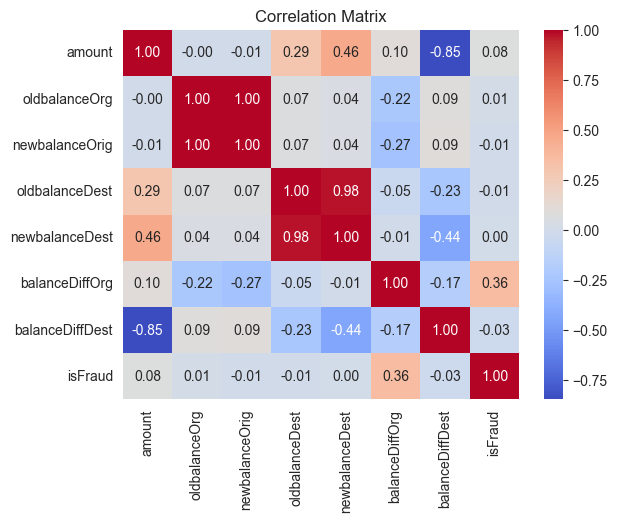

In [30]:
sns.heatmap(corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()  

### Flag Zero-Balance Transfers

In [31]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER", "CASH_OUT"]))
]

### Count Zero-Balance Transfers

In [32]:
len(zero_after_transfer)

1188074

### Inspect Zero-Balance Cases

In [33]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


### Refresh Fraud Label Counts

In [34]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

#Models working start here 

### Import Modeling Toolkit

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

### Review Prepared Data

In [36]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


### Build Modeling DataFrame

In [37]:
df_model = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


### Specify Feature Groups

In [38]:
categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

### Split Features And Target

In [39]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis=1)

### Partition Train And Test Sets

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Configure Column Transformer

In [41]:
prepropcessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
remaindder = "drop"

### Assemble Modeling Pipeline

In [42]:
pipeline = Pipeline(steps=[
    ('preprocessor', prepropcessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])


### Fit Logistic Regression Model

In [43]:
pipeline.fit(Xtrain, ytrain)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

### Generate Test Predictions

In [44]:
y_pred = pipeline.predict(Xtest)

### Evaluate Classification Report

In [45]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.94      0.04      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.94      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



### Display Confusion Matrix

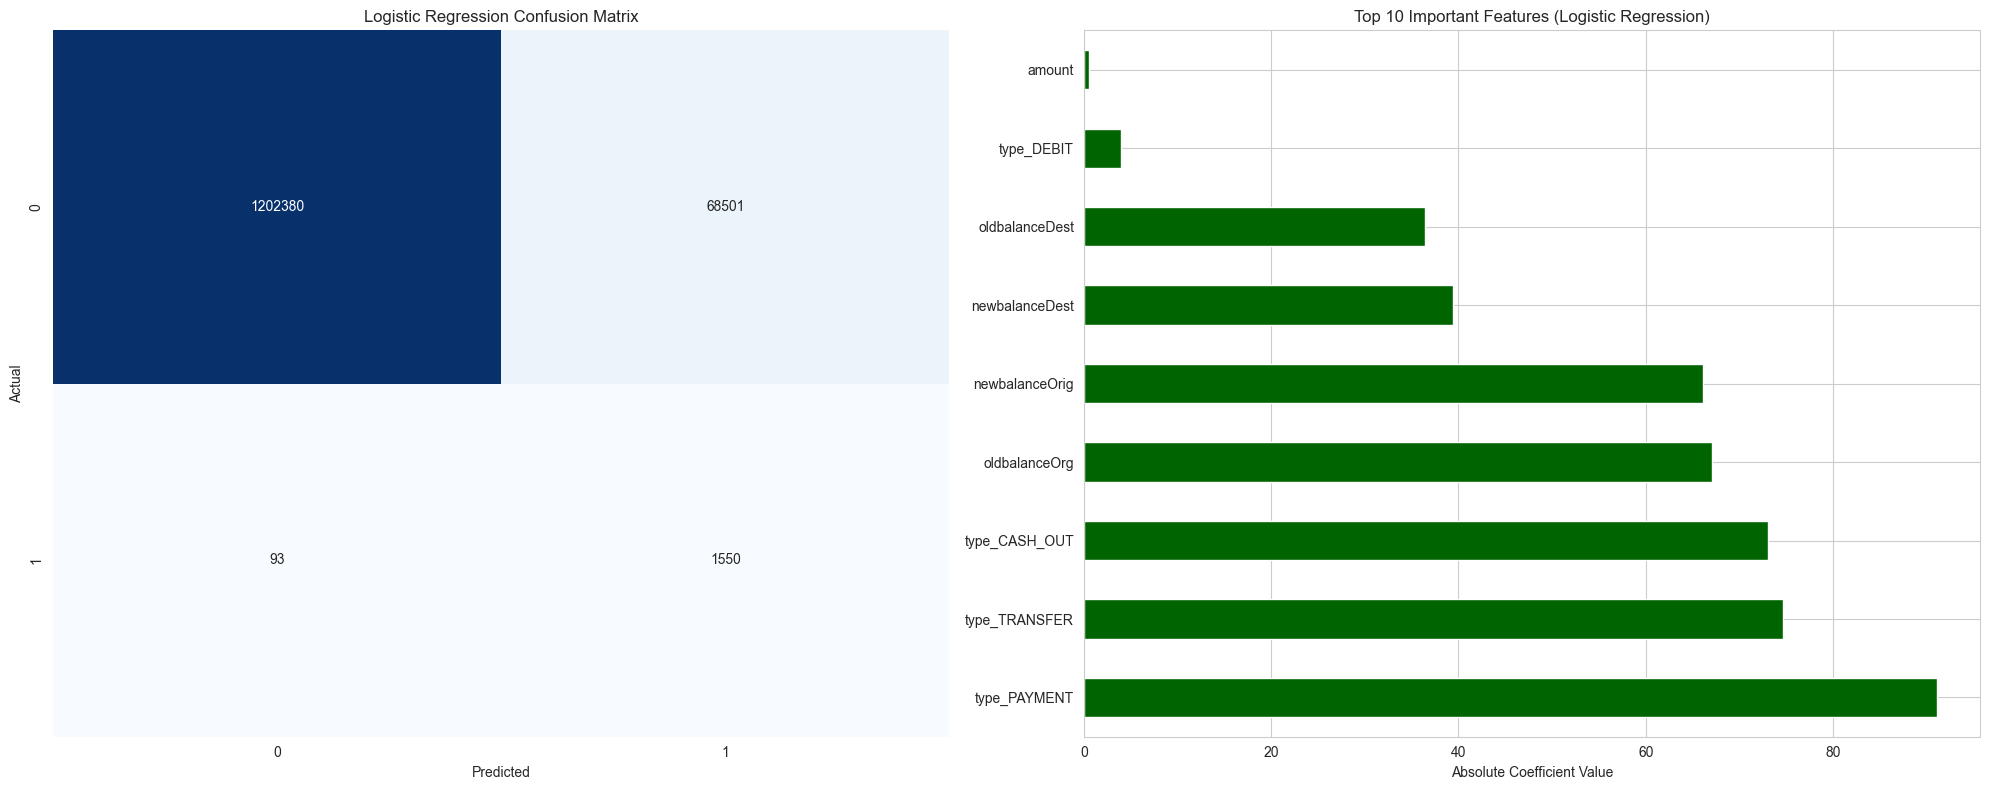

In [46]:
# Create a figure for visual results
plt.figure(figsize=(20, 8))

# --- Subplot 1: Confusion Matrix ---
plt.subplot(1, 2, 1)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# --- Subplot 2: Feature Importance (Coefficients) ---
# LogisticRegression uses coefficients instead of feature_importances_
plt.subplot(1, 2, 2)
# Get feature names after transformation
feature_names = numerical_features + [f'type_{cat}' for cat in ['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']]
coefficients = pipeline.named_steps['classifier'].coef_[0]
feat_importances = pd.Series(abs(coefficients), index=feature_names)
feat_importances.nlargest(10).plot(kind='barh', color='darkgreen')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

### Build And Evaluate XGBoost Pipeline

In [47]:
# Balance the gradient boosting loss for the rare fraud class
pos_weight = (ytrain == 0).sum() / (ytrain == 1).sum()

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', prepropcessor),
    ('classifier', XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        scale_pos_weight=pos_weight,
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_pipeline.fit(Xtrain, ytrain)
xgb_pred = xgb_pipeline.predict(Xtest)
xgb_proba = xgb_pipeline.predict_proba(Xtest)[:, 1]

print("XGBoost classification report")
print(classification_report(ytest, xgb_pred))
print(f"XGBoost ROC-AUC: {roc_auc_score(ytest, xgb_proba):.4f}")

XGBoost classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.36      0.99      0.53      1643

    accuracy                           1.00   1272524
   macro avg       0.68      1.00      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

XGBoost ROC-AUC: 0.9995


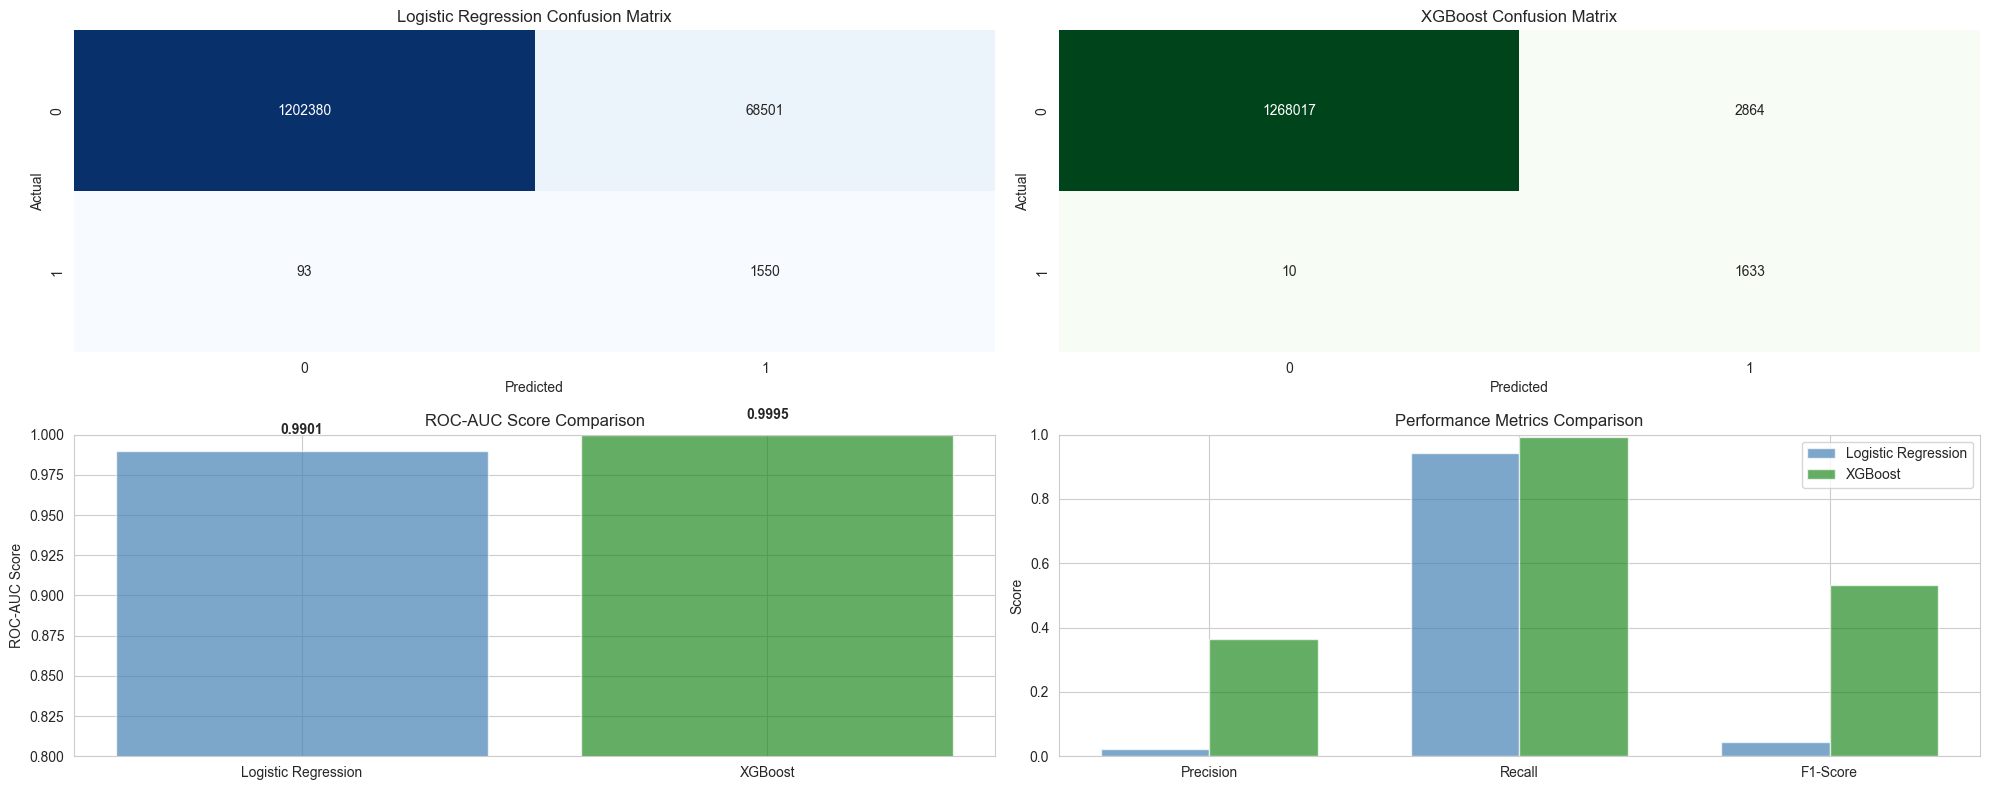

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create a figure for comparing Logistic Regression and XGBoost
plt.figure(figsize=(20, 8))

# --- Subplot 1: Confusion Matrix Comparison ---
plt.subplot(2, 2, 1)
cm_lr = confusion_matrix(ytest, y_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
cm_xgb = confusion_matrix(ytest, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# --- Subplot 3: ROC-AUC Score Comparison ---
plt.subplot(2, 2, 3)
lr_proba = pipeline.predict_proba(Xtest)[:, 1]
lr_roc_auc = roc_auc_score(ytest, lr_proba)
xgb_roc_auc = roc_auc_score(ytest, xgb_proba)

models = ['Logistic Regression', 'XGBoost']
roc_scores = [lr_roc_auc, xgb_roc_auc]
colors = ['steelblue', 'forestgreen']

plt.bar(models, roc_scores, color=colors, alpha=0.7)
plt.ylim([0.8, 1.0])
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Score Comparison')
for i, score in enumerate(roc_scores):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontweight='bold')

# --- Subplot 4: Performance Metrics Comparison ---
plt.subplot(2, 2, 4)

lr_precision = precision_score(ytest, y_pred)
lr_recall = recall_score(ytest, y_pred)
lr_f1 = f1_score(ytest, y_pred)

xgb_precision = precision_score(ytest, xgb_pred)
xgb_recall = recall_score(ytest, xgb_pred)
xgb_f1 = f1_score(ytest, xgb_pred)

metrics = ['Precision', 'Recall', 'F1-Score']
lr_scores = [lr_precision, lr_recall, lr_f1]
xgb_scores = [xgb_precision, xgb_recall, xgb_f1]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='steelblue', alpha=0.7)
plt.bar(x + width/2, xgb_scores, width, label='XGBoost', color='forestgreen', alpha=0.7)

plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

### Record Model Accuracy

In [49]:
pipeline.score(Xtest, ytest) *100

94.60961050636372

In [50]:
xgb_pipeline.score(Xtest, ytest) *100

99.77414964275722

### Persist Trained Model

In [51]:
import joblib

joblib.dump(xgb_pipeline, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

### Export Feature Matrix

In [52]:
# save the features dataframe to CSV
X.to_csv("input_data.csv", index=False)